## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE =  1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.55, 0.65, 0.75, 0.85, 0.95]

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mu in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MU = %.6f" % (mu))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mu)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "mu-%s" % str(mu)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MU = 0.550000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 11s 226us/step - loss: 1.0407 - accuracy: 0.6371 - val_loss: 1.5933 - val_accuracy: 0.4661
Epoch 49/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.0249 - accuracy: 0.6399 - val_loss: 1.3880 - val_accuracy: 0.5092
Epoch 50/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.0149 - accuracy: 0.6445 - val_loss: 1.5411 - val_accuracy: 0.4978
Experiment with MU = 0.650000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 9s 177us/step - loss: 0.9717 - accuracy: 0.6573 - val_loss: 1.7359 - val_accuracy: 0.4483
Epoch 46/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.9561 - accuracy: 0.6640 - val_loss: 1.4153 - val_accuracy: 0.5165
Epoch 47/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.9437 - accuracy: 0.6699 - val_loss: 1.4124 - val_accuracy: 0.5158
Epoch 48/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.9341 - accuracy: 0.6726 - val_loss: 1.4898 - val_accuracy: 0.5033
Epoch 49/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.9224 - accuracy: 0.6762 - val_loss: 1.4515 - val_accuracy: 0.5120
Epoch 50/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.9064 - accuracy: 0.6811 - val_loss: 1.4839 - val_accuracy: 0.5210
Experiment with MU = 0.750000
Model: "model_1"
_________________________________________________________________
Layer

50000/50000 [==============================] - 9s 179us/step - loss: 0.8880 - accuracy: 0.6868 - val_loss: 1.4946 - val_accuracy: 0.5140
Epoch 43/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.8728 - accuracy: 0.6945 - val_loss: 1.3763 - val_accuracy: 0.5334
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.8588 - accuracy: 0.6997 - val_loss: 1.5199 - val_accuracy: 0.5039
Epoch 45/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.8494 - accuracy: 0.7026 - val_loss: 1.4974 - val_accuracy: 0.4962
Epoch 46/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8250 - accuracy: 0.7110 - val_loss: 1.5763 - val_accuracy: 0.4928
Epoch 47/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.8242 - accuracy: 0.7103 - val_loss: 1.4416 - val_accuracy: 0.5257
Epoch 48/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.7957 - accuracy: 0.7208 - val_loss:

Epoch 40/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.7123 - accuracy: 0.7498 - val_loss: 1.5119 - val_accuracy: 0.5317
Epoch 41/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.6929 - accuracy: 0.7551 - val_loss: 1.6000 - val_accuracy: 0.5079
Epoch 42/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.6761 - accuracy: 0.7624 - val_loss: 1.6350 - val_accuracy: 0.5074
Epoch 43/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.6625 - accuracy: 0.7664 - val_loss: 1.5856 - val_accuracy: 0.5245
Epoch 44/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.6362 - accuracy: 0.7782 - val_loss: 1.6181 - val_accuracy: 0.5157
Epoch 45/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.6189 - accuracy: 0.7815 - val_loss: 1.8362 - val_accuracy: 0.4997
Epoch 46/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.6035 - accuracy: 0.78

50000/50000 [==============================] - 10s 201us/step - loss: 0.5941 - accuracy: 0.7880 - val_loss: 1.7230 - val_accuracy: 0.5297
Epoch 38/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.5761 - accuracy: 0.7942 - val_loss: 1.7700 - val_accuracy: 0.5316
Epoch 39/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.5536 - accuracy: 0.8020 - val_loss: 1.7777 - val_accuracy: 0.5154
Epoch 40/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.5456 - accuracy: 0.8025 - val_loss: 1.8077 - val_accuracy: 0.5307
Epoch 41/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.5255 - accuracy: 0.8107 - val_loss: 1.8018 - val_accuracy: 0.5307
Epoch 42/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.4945 - accuracy: 0.8222 - val_loss: 1.9009 - val_accuracy: 0.5248
Epoch 43/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.4803 - accuracy: 0.8277 - val_los

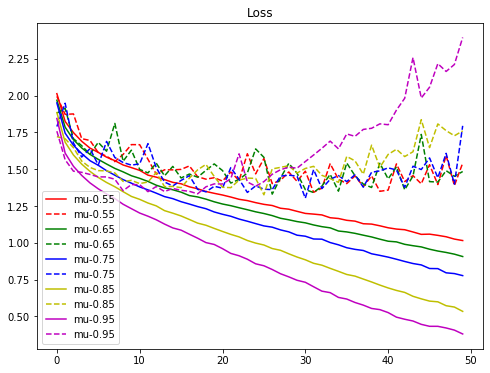

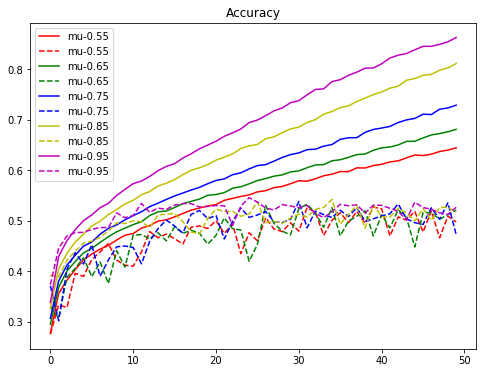

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()